In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## import the cleaned_shopify_orderlines data of 2023-2024

%%bigquery df --project fb-business-datasets
SELECT order_number, created_at, email
FROM fb-business-datasets.ds_tables.cleaned_shopify_orderlines_23

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1637465, 3)
(929646, 3)


In [ ]:
print(np.min(df['created_at']))
print(np.max(df['created_at']))

2023-01-01 00:01:31+00:00
2024-07-01 19:34:10+00:00


In [ ]:
# Function to calculate holiday date range with offsets
def holiday_date_range(year, month, day, offset):
    start_date = pd.Timestamp(year, month, day) - pd.Timedelta(days = offset)
    end_date = pd.Timestamp(year, month, day) + pd.Timedelta(days = offset+1)

    start_date = start_date.tz_localize('UTC')
    end_date = end_date.tz_localize('UTC')

    return start_date, end_date

In [ ]:
offset = 3

holidays = {
    'New Year': [(2023, 1, 1, offset), (2024, 1, 1, offset)],
    'Super Bowl': [(2023, 2, 12, offset), (2024, 2, 11, offset)], # overlap
    'Valentine\'s Day': [(2023, 2, 14, offset), (2024, 2, 14, offset)], # overlap
    'Presidents\' Day': [(2023, 2, 20, offset), (2024, 2, 19, offset)],
    'International Women\'s Day': [(2023, 3, 8, offset), (2024, 3, 8, offset)],
    'Pi Day': [(2023, 3, 14, offset), (2024, 3, 14, offset)], # overlap
    'St Patrick\'s Day': [(2023, 3, 17, offset), (2024, 3, 17, offset)], # overlap
    'Easter': [(2023, 4, 9, offset), (2024, 3, 31, offset)],
    'Earth Day': [(2023, 4, 22, offset), (2024, 4, 22, offset)],
    'Mother\'s Day': [(2023, 5, 14, offset), (2024, 5, 12, offset)],
    'Father\'s Day': [(2023, 6, 18, offset), (2024, 6, 16, offset)],
    'Independence Day': [(2023, 7, 4, offset), (2024, 7, 4, offset)],
    'Labor Day': [(2023, 9, 4, offset), (2024, 9, 2, offset)],
    'Halloween': [(2023, 10, 31, offset), (2024, 10, 31, offset)],
    'Thanksgiving': [(2023, 11, 23, offset), (2024, 11, 28, offset)], # overlap
    'Black Friday': [(2023, 11, 24, offset), (2024, 11, 29, offset)], # overlap
    'Cyber Monday': [(2023, 11, 27, offset), (2024, 12, 2, offset)], # overlap
    'Super Saturday': [(2023, 12, 15, offset), (2024, 12, 21, offset)],
    'Christmas': [(2023, 12, 25, offset), (2024, 12, 25, offset)]
}

In [ ]:
# Iterate over holiday date ranges and set dummy variables
for holiday, dates in holidays.items():
    df[holiday] = 0  # Initialize the column for each holiday
    for year, month, day, offset in dates:
        start_date, end_date = holiday_date_range(year, month, day, offset)
        mask = (df['created_at'] >= start_date) & (df['created_at'] <= end_date)
        df.loc[mask, holiday] = 1

In [ ]:
df[df['Black Friday'] == 1]

,order_number,created_at,email,New Year,Super Bowl,Valentine's Day,Presidents' Day,International Women's Day,Pi Day,St Patrick's Day,...,Mother's Day,Father's Day,Independence Day,Labor Day,Halloween,Thanksgiving,Black Friday,Cyber Monday,Super Saturday,Christmas
13,1818568,2023-11-27 18:35:37+00:00,ALABERTRAM@GMAIL.COM,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
71,1814762,2023-11-25 23:22:12+00:00,Nanapooh1959@gmail.com,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
98,1810051,2023-11-23 21:01:52+00:00,a_bha@hotmail.com,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
120,1807745,2023-11-21 07:35:04+00:00,aimeewheeling@yahoo.com,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
136,1813290,2023-11-25 06:06:07+00:00,alexisnkoon@yahoo.com,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637421,1818650,2023-11-27 19:17:29+00:00,chrissyball1111@yahoo.com,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1637427,1814845,2023-11-25 23:52:26+00:00,csdeem@suddenlink.net,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1637437,1811730,2023-11-24 21:36:33+00:00,hoovermb74@hotmail.com,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1637440,1813032,2023-11-25 04:39:49+00:00,jessicaellenstanley@gmail.com,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0


In [ ]:
project_id = 'fb-business-datasets'  # Google Cloud project ID
destination_table = 'fb-business-datasets.ds_tables.holiday_2324'  # destination table name in BigQuery
df.to_gbq(destination_table, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 8683.86it/s]


In [ ]:
## The ranking of holidays in 2023 based on the number of orders
holiday_orders_23 = df[df['created_at'].dt.year == 2023].iloc[:, 3:].sum(axis=0)
holiday_orders_23

New Year                      8098
Super Bowl                    6085
Valentine's Day               6399
Presidents' Day               6833
International Women's Day     6722
Pi Day                        8597
St Patrick's Day             10624
Easter                        7230
Earth Day                     8075
Mother's Day                  7562
Father's Day                  7528
Independence Day             13206
Labor Day                    16885
Halloween                     9469
Thanksgiving                  9940
Black Friday                 11437
Cyber Monday                 13116
Super Saturday               13132
Christmas                    11719
dtype: int64

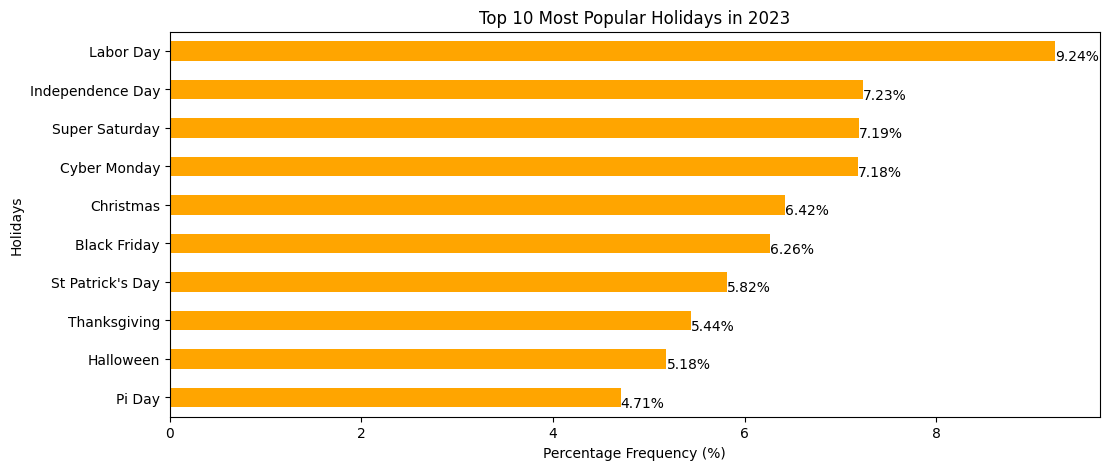

In [ ]:
# Finding the top 10 most popular holidays/events in 2023
holiday_percent_23 = (holiday_orders_23/np.sum(holiday_orders_23) * 100).sort_values(ascending=False)
top_10_holiday_23 = holiday_percent_23.head(10)

# Plotting the top 10 most popular holidays/events in 2023
plt.figure(figsize=(12, 5))
top_10_holiday_23.plot(kind='barh', color='orange')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_holiday_23):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Holidays in 2023')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Holidays')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
## The ranking of holidays in 2024 based on the number of orders
holiday_orders_24 = df[df['created_at'].dt.year == 2024].iloc[:, 3:].sum(axis=0)
holiday_orders_24

New Year                      7308
Super Bowl                   13439
Valentine's Day              13452
Presidents' Day              14850
International Women's Day    14520
Pi Day                       15544
St Patrick's Day             14782
Easter                       22505
Earth Day                    11792
Mother's Day                 13753
Father's Day                 18991
Independence Day              2653
Labor Day                        0
Halloween                        0
Thanksgiving                     0
Black Friday                     0
Cyber Monday                     0
Super Saturday                   0
Christmas                        0
dtype: int64

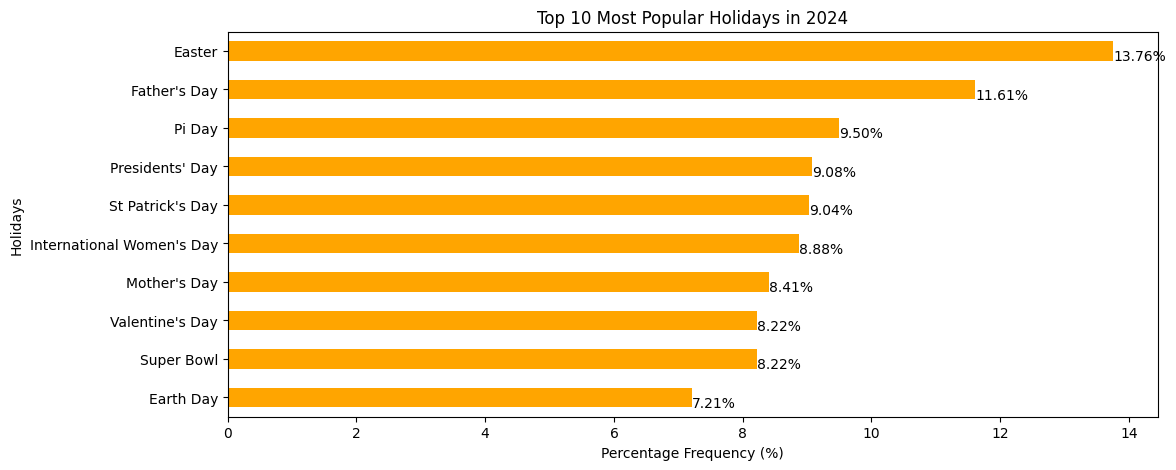

In [ ]:
# Finding the top 10 most popular holidays/events in 2024
holiday_percent_24 = (holiday_orders_24/np.sum(holiday_orders_24) * 100).sort_values(ascending=False)
top_10_holiday_24 = holiday_percent_24.head(10)

# Plotting the top 10 most popular holidays/events in 2024
plt.figure(figsize=(12, 5))
top_10_holiday_24.plot(kind='barh', color='orange')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_holiday_24):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Holidays in 2024')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Holidays')
plt.gca().invert_yaxis()
plt.show()